<a href="https://colab.research.google.com/github/sammyamajumdar/my_website/blob/main/Assignment3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
STUDENT_ID = ""

---

# MTH765P - Coursework 3
This is a template notebook for the third coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Note that you may add other cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. **Please submit only this file, without changing its name to QMPlus.**


##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---------
---------
 
 1.) Linear models and residuals

--------
--------

Run the next cell to load the first dataset.

--------




In [5]:
X = pd.read_csv('1.csv',sep=' ')
X.head()

,x,y
0,-1.167390,-40.099714
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918


----

a.) Use _numpy.polyfit()_ to fit a linear model to the data, storing the parameters into variables called _m_ and _b_ respectively for the slope and y-intercept. 

----

In [6]:
# YOUR CODE HERE
m, b = np.polyfit(np.array(X['x']), np.array(X['y']), deg=1) # degree = 1 since model is linear
print(f'slope: {m}, y-intercept: {b}')
#raise NotImplementedError()

slope: 6.52369915154896, y-intercept: -8.23459150594651


----

b.) Compute the residual of the data with respect to the model and store them in a variable called _res_

----

In [7]:
# YOUR CODE HERE

y_predictions = np.dot(np.array(X['x']), m) + b
y_true = np.array(X['y'])

res = np.sum(np.square(y_predictions - y_true))
print(f'residual: {res}')


# raise NotImplementedError()

residual: 38313.762760977275


----

c.) Plot an unnormalised histogram of the residuals with 40 bins

----

Text(0, 0.5, 'Count')

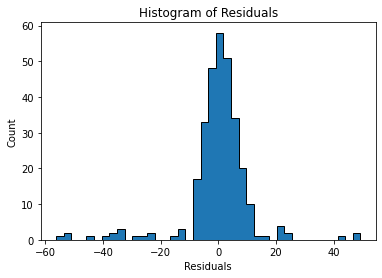

In [8]:
# YOUR CODE HERE
res_array = y_true - y_predictions


fig, axs = plt.subplots()
n_bins=40

axs.hist(res_array, histtype='stepfilled',bins=n_bins, ec='k')
axs.set_title('Histogram of Residuals')
axs.set_xlabel('Residuals')
axs.set_ylabel('Count')

# raise NotImplementedError()

----

d.) Is the linear model a good fit? (one or two sentences)

----

YOUR ANSWER HERE

The linear model is a decent fit for the data if we are to neglect outliers (there are plenty of those in the dataset.). If we were to consider those, its a pretty underfitted model - shown by a high residual sum of squares metric of 38,313.7. 

----

e.) Complete the function below to compute hinges of the input x, which should be set at the 30th and 70th quantile.

----

In [9]:
def hinges(x):
# YOUR CODE HERE

    lower  = np.quantile(x, 0.3)
    upper = np.quantile(x, 0.7)
# raise NotImplementedError()
    return lower,upper

----

f.) Use the above function to compute the inner fences of the residuals. Store the results in the variables _lower_fence_ and _upper_fence_ respectively.

----

In [10]:
# YOUR CODE HERE
 
lower, upper = hinges(res_array)
inter = upper - lower

# inner fences
lower_fence = lower - 1.5 * (inter)
upper_fence = upper + 1.5 * (inter)

print(f'upper_fence: {upper_fence}, lower_fence: {lower_fence} ')


# raise NotImplementedError()

upper_fence: 12.019837585630626, lower_fence: -10.330844508526184 


----

g.) Create a new Dataframe called _Y_ with all the values corresponding to residuals which are beyond the inner fences removed.

----

In [18]:
# YOUR CODE HERE

features_arr = list(X['x'])

labels_outlier = []
X_outlier = []


indices_del = []

for item in range(len(res_array)): 
    if (res_array[item] > upper_fence or res_array[item] < lower_fence):
        X_outlier.append(features_arr[item])
        labels_outlier.append(y_true[item])
        indices_del.append(item)

features_arr_mod = np.delete(features_arr, indices_del)
y_true_mod = np.delete(y_true, indices_del)


# passing the new dataset as a dictionary
newX = {
    'x' : features_arr_mod,
    'y' : y_true_mod
}

Y = pd.DataFrame(newX)
#raise NotImplementedError()

In [12]:
Y

,x,y
0,-1.082710,-19.151187
1,-1.063447,-16.397238
2,-1.061148,-11.336125
3,-0.993360,-19.188918
4,-0.990390,-17.154749
...,...,...
265,0.993728,1.399987
266,0.999342,-6.721107
267,1.038887,-0.327475
268,1.081022,9.416868


----

h.) Fit a new linear model and plot the  outliers as red points, the remainder of the points (non-outliers) as blue stars (\*), the original model as a black line and the new model shown as a green line. Store the new model parameters in the variables _m\_new_ and _b\_new_.

----

Text(0.5, 0, 'x (feature)')

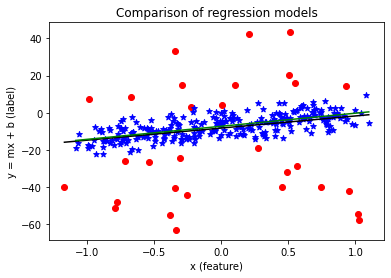

In [20]:
# YOUR CODE HERE

feature = np.array(Y['x'])
label = np.array(Y['y'])
m_new, b_new = np.polyfit(feature, label, deg=1)

plt.scatter(X_outlier, labels_outlier, color='red')
plt.scatter(features_arr_mod, y_true_mod, color='blue', marker='*')

# old model
plt.plot(features_arr, y_predictions, color='black')

# new model
plt.plot(Y['x'], np.dot(Y['x'], m_new)+b_new, color='green')

plt.title('Comparison of regression models')
plt.ylabel('y = mx + b (label)')
plt.xlabel('x (feature)')


# raise NotImplementedError()

----

j.) Is what you did above different from computing (and filtering) the outliers on the original data? If so, describe how, otherwise explain why they are the same. (a few sentences)

----

YOUR ANSWER HERE


Theres hardly any difference in the two linear models since these models assumes that dependant and independant variables are linearly related. The model requires a higher degree of x to be sensitive to the outliers.

### 2.)

The next dataset is on the sales of video games. 

---------
---------

a.) Use pandas to read in the file **games.csv** into a dataframe called _games_



In [21]:
games = pd.read_csv('2.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



 ----
 
a.) Find answers to the following questions about the dataframe.
- How many genres are there? Store the answer in a variable called _num_genres_. 
- How many publishers are there? Store the answer in a variable _num_publishers_.
- How many platforms are there? Store the answer in a variable _num_platforms_.

----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

b.) Create a box-and-whisker plot of Global Sales by genre.

----

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

c.) Find the upper outer fence thresholds for each genre (assuming hinges at the 25th and 75th percentile). Store them in a dictionary {genre:upper outer fence} called ufence.

---

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----

d.) Plot the unnormalised histogram with 20 bins for all sports games whose Global sales which are beyond the outer fence.


----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

---- 
e.) If these are successful games - what can you say about the maximum versus the typical successful game? What are the problems with using the average (overall or just the succesful games).

---

YOUR ANSWER HERE

----

f.) Create a plot of Global Sales with a line for the following platforms per year.
- 2600, NES, SNES, GEN, N64, GC, WII, PS, PS2, PS3, PS4, X360, XB, XOne

----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()